In [1]:
import pandas as pd
import numpy as np

# estudo de dados

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


fillna e tratamentos iniciais

In [5]:
mean_sex_Pclass = df.groupby(["Sex", "Pclass"])["Age"].mean().round(2)

In [6]:
def fill_age(e):
    if pd.isna(e["Age"]):
        return mean_sex_Pclass[e["Sex"], e["Pclass"]]
    else:
        return e["Age"]

In [7]:
df["Age"] = df.apply(fill_age, axis=1)

In [8]:
df.dropna(subset="Fare", inplace=True)

In [9]:
df.Fare

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 417, dtype: float64

In [10]:
df.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

tratamento de adaquação para treino

In [11]:
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [12]:
def find_cabin_letter(c, df):
    return [1 if (isinstance(x, str) and c in x) else 0 for x in df["Cabin"]]

In [13]:
cabin_letters = ["B", "C"] 
# cabins C and B are the only cabins with some significant representation on the df
for c in cabin_letters:
    df["Cabin_" + c] = find_cabin_letter(c, df)
df.drop(["Cabin"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_B,Cabin_C
0,0,3,male,34.5,0,0,7.8292,Q,0,0
1,1,3,female,47.0,1,0,7.0000,S,0,0
2,0,2,male,62.0,0,0,9.6875,Q,0,0
3,0,3,male,27.0,0,0,8.6625,S,0,0
4,1,3,female,22.0,1,1,12.2875,S,0,0


In [14]:
df = df.join(pd.get_dummies(df["Embarked"], prefix="Embarked", dtype=int, drop_first=True))
df = df.join(pd.get_dummies(df["Pclass"], prefix="Class",dtype=int, drop_first=True))
df = df.join(pd.get_dummies(df["Sex"], dtype=int, drop_first=True))
df.drop(["Embarked", "Sex", "Pclass"], axis=1, inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare,Cabin_B,Cabin_C,Embarked_Q,Embarked_S,Class_2,Class_3,male
0,0,34.5,0,0,7.8292,0,0,1,0,0,1,1
1,1,47.0,1,0,7.0000,0,0,0,1,0,1,0
2,0,62.0,0,0,9.6875,0,0,1,0,1,0,1
3,0,27.0,0,0,8.6625,0,0,0,1,0,1,1
4,1,22.0,1,1,12.2875,0,0,0,1,0,1,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    417 non-null    int64  
 1   Age         417 non-null    float64
 2   SibSp       417 non-null    int64  
 3   Parch       417 non-null    int64  
 4   Fare        417 non-null    float64
 5   Cabin_B     417 non-null    int64  
 6   Cabin_C     417 non-null    int64  
 7   Embarked_Q  417 non-null    int64  
 8   Embarked_S  417 non-null    int64  
 9   Class_2     417 non-null    int64  
 10  Class_3     417 non-null    int64  
 11  male        417 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 42.4 KB


separação de dados para treino

In [16]:
y = df.Survived
X = df.drop(
    [
        "Survived", 
        #"male"
    ], axis=1
)

In [17]:
list(df.columns)

['Survived',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin_B',
 'Cabin_C',
 'Embarked_Q',
 'Embarked_S',
 'Class_2',
 'Class_3',
 'male']

In [18]:
num_cols = ["Age", "Fare"]
cat_cols = [e for e in X.columns if e not in num_cols]

# treinamento

separação para treino

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

treinamento

In [20]:
import xgboost as xgb

In [21]:
model = xgb.XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


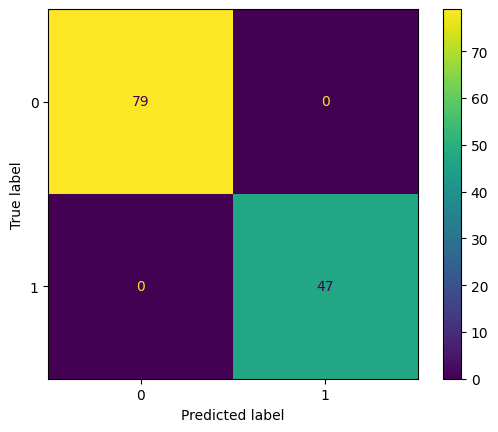

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# shap

In [25]:
import shap
shap.initjs

/Users/bernardorusso/Documents/GitHub/pos-grad-tcc-study/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<function shap.plots._force.initjs()>

In [26]:
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

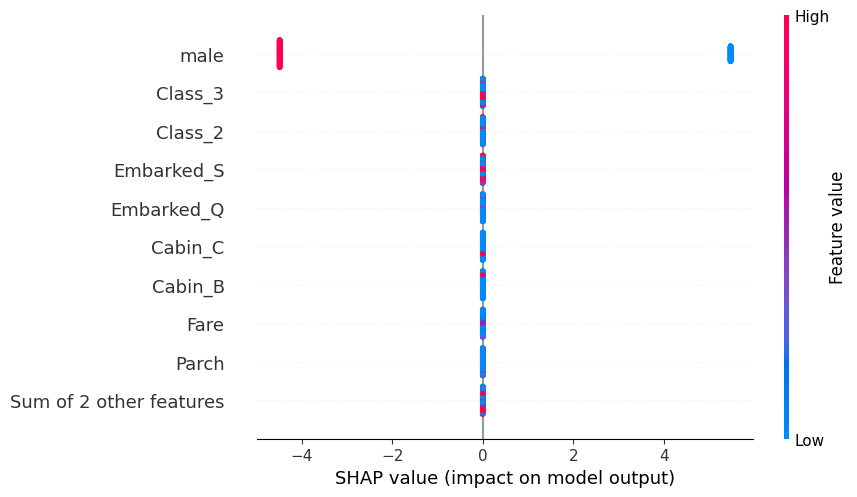

In [27]:
shap.plots.beeswarm(shap_values)

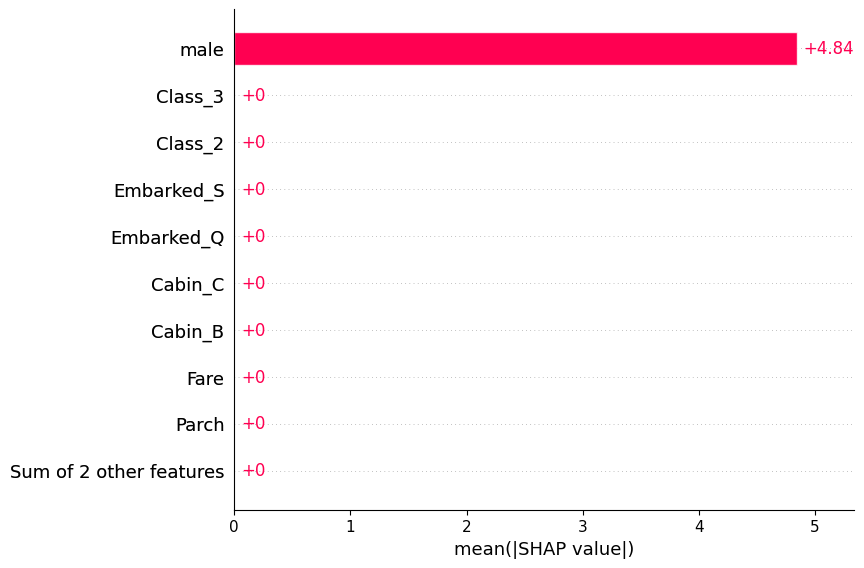

In [28]:
shap.plots.bar(shap_values)

# ICE & PDP

In [29]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

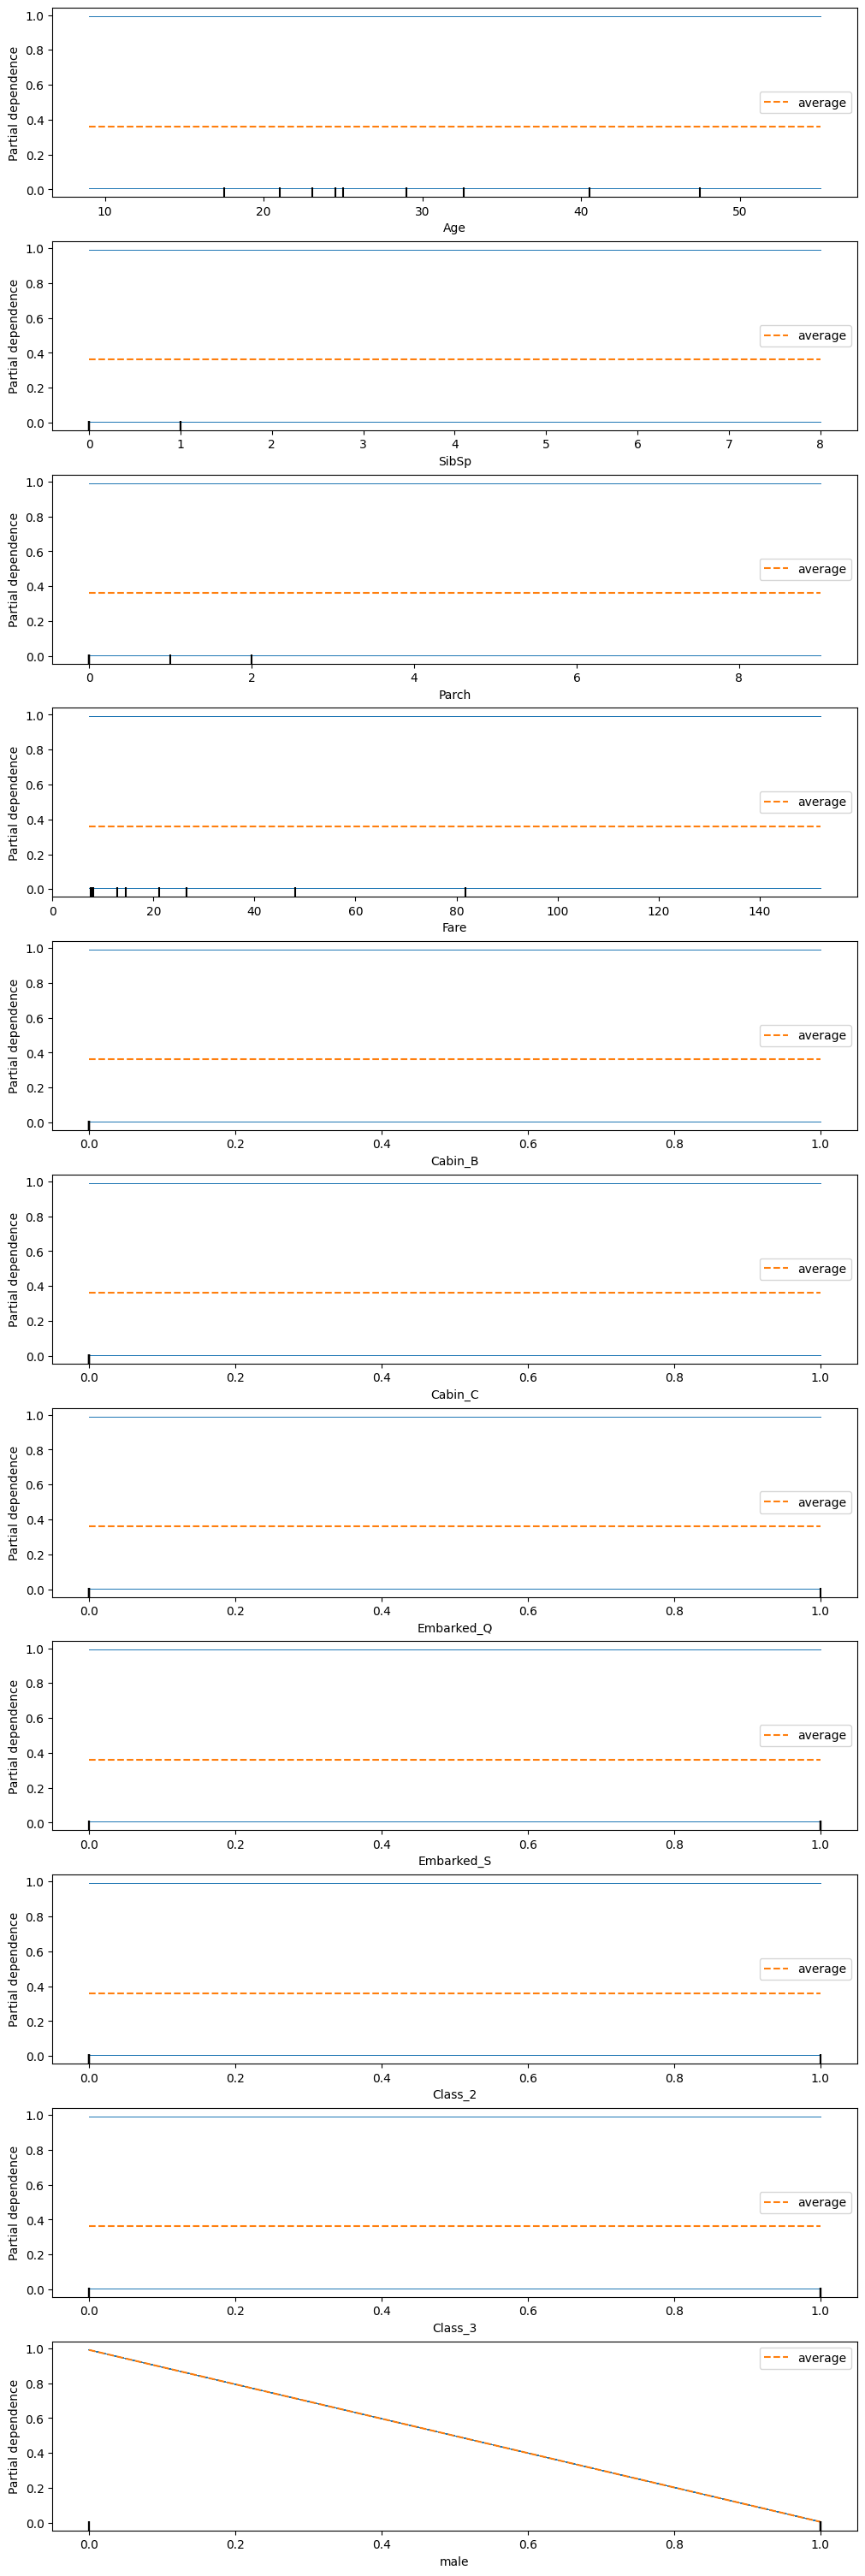

In [30]:
common_params= {
    "subsample":50,
    "n_jobs":2,
    "grid_resolution":20,
    "random_state":42
}
features_info={
    "features":[
        'Age',
        'SibSp',
        'Parch',
        'Fare',
        'Cabin_B',
        'Cabin_C',
        'Embarked_Q',
        'Embarked_S',
        'Class_2',
        'Class_3',
        'male'
    ],
    "kind":"both",
}
_, ax = plt.subplots(ncols=1, nrows=11, figsize=(10, 30), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    **features_info,
    ax=ax,
    **common_params
)